# Calcul approché d'integrales - Methodes des rectangles - Trapèzes - Simpson.

In [21]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import time 
np.set_printoptions(precision =5 )

## Tracer - Méthode des rectangles - point milieu

La fonction linspace(a,b,n) de la librairie numpy construit n points uniformement repartis sur [a,b]. Elle renvoie un tableau de n elements:

In [22]:
def trace_rect(f, a,b,N):
    n = 1000
    X = np.linspace(a,b, n)
    Vf = f(X)
    
    U = np.linspace(a,b,N)
    V_rect1 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect1[i] = f(U[j])
    
    V_rect2 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect2[i] = f(U[j+1])

    V_rect3 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect3[i] = f((U[j]+U[j+1])/2)
                    
    plt.plot(X, Vf)
    plt.plot(X, V_rect1)
    plt.plot(X, V_rect2)
    plt.plot(X, V_rect3)
    plt.legend(['f', 'RG', 'RD', 'PM'], loc = 'center')
    plt.title('Methode des rectangles')

    # return 0

In [23]:
def trace_trap(f, a,b,N):
    n = 1000
    X = np.linspace(a,b, n)
    Vf = f(X)
    
    U = np.linspace(a,b,N)
    V_rect1 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]): 
                a = (f(U[j])-f(U[j+1]))/(U[j]-U[j+1]) 
                b = f(U[j+1]) - a*U[j+1] 
                V_rect1[i] = a*X[i] + b 
                    
    plt.plot(X, Vf)
    plt.plot(X, V_rect1)


In [24]:
f1 = lambda x: x**2
f2 = lambda x: 1/(x+1)**2
f3 = lambda x: (x+1)**0.5

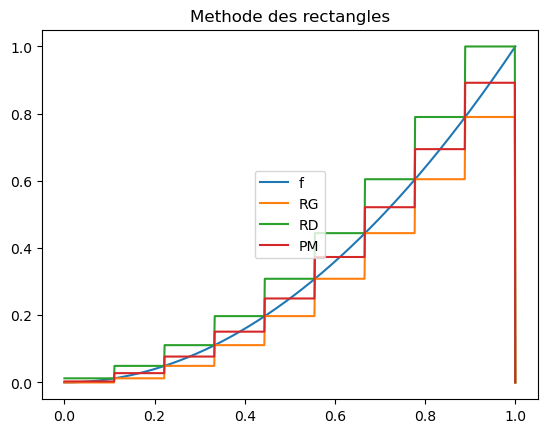

In [25]:
trace_rect(f1, 0,1,10)

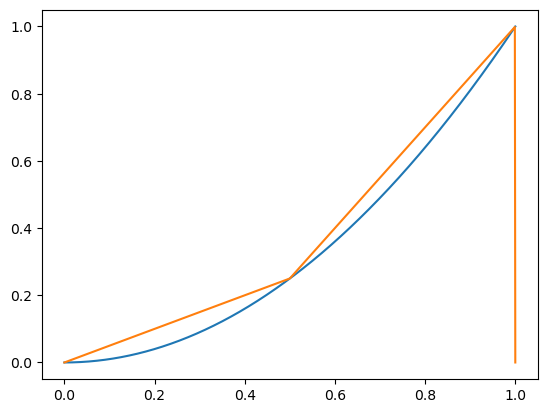

In [26]:
trace_trap(f1, 0,1,3)

In [27]:
def RG(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(N):
        s = s + f(subd[i])
    s = s * ((b-a)/N)
    return s

def RD(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(1,N+1):
        s = s + f(subd[i])
    s = s * ((b-a)/N)
    return s

def PM(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(0,N):
        s = s + f((subd[i]+subd[i+1])/2)
    s = s * (b-a)/N
    return s

def Int_trap(f, a,b,N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(N):
        s += ( f(subd[i]) + f(subd[i+1]) )/2
    s = s*(b-a)/N
    return s

def Simpson(f, a,b,N):
    s=0
    x = np.linspace(a,b,N+1)
    for i in range(N):
        s += (f(x[i]) + 4*f((x[i]+x[i+1])/2) + f(x[i+1]))
    s = s*(b-a)/(6*N)
    return s

## Comparaison des erreurs commises

In [28]:
def erreur(f, a,b,s,N):
    return np.array([abs(RG(f,a,b,N) - s), abs(RD(f,a,b,N) - s), abs(PM(f,a,b,N) - s), abs(Int_trap(f,a,b,N) - s), abs(Simpson(f,a,b,N)-s)])

In [29]:
df_er_f1 = pd.DataFrame()
for i in [10**1, 10**2, 10**3, 10**4,10**5]:
    df_er_f1 = pd.concat([df_er_f1,pd.DataFrame(erreur(f1,0,1,math.log(2),i))], axis=1)
df_er_f1.columns = ['N=10', 'N=100', 'N=1000','10000','100000']
df_er_f1.index = ['Rectangle Gauche', 'Rectangle Droite', 'Point milieu', 'Trapeze', 'Simpson']
df_er_f1

,N=10,N=100,N=1000,10000,100000
Rectangle Gauche,0.408147,0.364797,0.360314,0.359864,0.359819
Rectangle Droite,0.308147,0.354797,0.359314,0.359764,0.359809
Point milieu,0.360647,0.359822,0.359814,0.359814,0.359814
Trapeze,0.358147,0.359797,0.359814,0.359814,0.359814
Simpson,0.359814,0.359814,0.359814,0.359814,0.359814


In [30]:
df_er_f2 = pd.DataFrame()
for i in [10**1, 10**2, 10**3, 10**4,10**5]:
    df_er_f2 = pd.concat([df_er_f2,pd.DataFrame(erreur(f2,0,1,math.log(2),i))], axis=1)
df_er_f2.columns = ['N=10', 'N=100', 'N=1000','10000','100000']
df_er_f2.index = ['Rectangle Gauche', 'Rectangle Droite', 'Point milieu', 'Trapeze', 'Simpson']
df_er_f2

,N=10,N=100,N=1000,10000,100000
Rectangle Gauche,0.154192,0.189383,0.192772,0.193110,0.193143
Rectangle Droite,0.229192,0.196883,0.193522,0.193185,0.193151
Point milieu,0.193874,0.193154,0.193147,0.193147,0.193147
Trapeze,0.191692,0.193133,0.193147,0.193147,0.193147
Simpson,0.193146,0.193147,0.193147,0.193147,0.193147


In [31]:
df_er_f3 = pd.DataFrame()
for i in [10**1, 10**2, 10**3, 10**4,10**5]:
    df_er_f3 = pd.concat([df_er_f3,pd.DataFrame(erreur(f3,0,1,math.log(2),i))], axis=1)
df_er_f3.columns = ['N=10', 'N=100', 'N=1000','10000','100000']
df_er_f3.index = ['Rectangle Gauche', 'Rectangle Droite', 'Point milieu', 'Trapeze', 'Simpson']
df_er_f3

,N=10,N=100,N=1000,10000,100000
Rectangle Gauche,0.504972,0.523732,0.525597,0.525784,0.525802
Rectangle Droite,0.546393,0.527874,0.526011,0.525825,0.525806
Point milieu,0.525865,0.525805,0.525804,0.525804,0.525804
Trapeze,0.525682,0.525803,0.525804,0.525804,0.525804
Simpson,0.525804,0.525804,0.525804,0.525804,0.525804


#### Commentaires:
1. Méthodes des rectangles à gauche et à droite: lorsque l'on multiplie N par 10, l'erreur est divisée par 10:  l'erreur semble être en C/N.
2. Méthodes des rectangles point milieu et trapèze: lorsque l'on multiplie N par 10, l'erreur est divisée par 100:  l'erreur semble être en C/N<sup>2</sup>.
3. Méthode de Simpson: l'erreur est la plus petite pour cette méthode, et l'ordre semble invariable. Cette methode nous donne des solutions plus exactes que les précedentes

## Comparaison des temps de calculs

In [32]:
def temps(f,a,b,N):
    # print(f'Temps de calcul pour {N} iterations\n')
    tic = time.time()
    RG(f,a,b,N)
    toc_rg = format(time.time() - tic,'.2E')
    # print('- RG: ', format(toc_rg,'.2E'), 'secondes\n')
    
    tic = time.time()
    RD(f,a,b,N)
    toc_rd = format(time.time() - tic,'.2E')
    # print('- RD: ', format(toc_rd,'.2E'), 'secondes\n')

    tic = time.time()
    PM(f,a,b,N)
    toc_pm = format(time.time() - tic,'.2E')
    # print('- PM: ', format(toc_pm,'.2E'), 'secondes\n')


    tic = time.time()
    Int_trap(f,a,b,N)
    toc_tr = format(time.time() - tic,'.2E')
    # print('- Trapeze: ', format(toc_tr,'.2E'), 'secondes\n')


    tic = time.time()
    Simpson(f,a,b,N)
    toc_sm = format(time.time() - tic,'.2E')
    # print('- Simpson: ', format(toc_sm,'.2E'), 'secondes\n')

    return np.array([toc_rg, toc_rd, toc_pm, toc_tr, toc_sm])


In [33]:
df_temps = pd.DataFrame()
for i in [10**1, 10**2, 10**3, 10**4,10**5]:
    df_temps = pd.concat([df_temps,pd.DataFrame(temps(f1,0,1,i))], axis=1)
df_temps.columns = ['N=10', 'N=100', 'N=1000','10000','100000']
df_temps.index = ['Rectangle Gauche', 'Rectangle Droite', 'Point milieu', 'Trapeze', 'Simpson']
df_temps

,N=10,N=100,N=1000,10000,100000
Rectangle Gauche,8.08E-05,7.80E-05,1.70E-03,3.87E-03,3.93E-02
Rectangle Droite,3.60E-05,6.41E-05,4.55E-04,2.09E-02,3.75E-02
Point milieu,3.50E-05,8.82E-05,7.82E-04,1.53E-02,6.94E-02
Trapeze,3.58E-05,1.06E-04,1.49E-03,1.22E-02,1.36E-01
Simpson,4.10E-05,1.70E-04,1.57E-03,1.65E-02,2.26E-01


Il semble, que quand N croit, la méthode des trapèzes est un plus lente que la méthode des rectangles, point milieu et que la méthode de Simpson est beaucoup plus lente que la méthode des trapèzes.


## Ordre de convergence des méthodes

In [34]:
def Erreur(f,a,b,s,Nmax):
    E=np.zeros((Nmax,5))
    for N in range(Nmax):
        E[N,0]=abs(RD(f,a,b,N+1)-s)
        E[N,1]=abs(RG(f,a,b,N+1)-s)
        E[N,2]=abs(PM(f,a,b,N+1)-s)
        E[N,3]=abs(Int_trap(f,a,b,N+1)-s)
        E[N,4]=abs(Simpson(f,a,b,N+1)-s)

    return E

def vec_Erreur(f,a,b,s ,Nmax):

    X = np.zeros(Nmax)
    for n in range(Nmax):
        X[n]=n+1
    Vect_e =Erreur(f,a,b,s ,Nmax)
    plt.plot(np.log(X),np.log(Vect_e[:,0]), label='RG')
    plt.plot(np.log(X),np.log(Vect_e[:,1]), label='RD')
    plt.plot(np.log(X),np.log(Vect_e[:,2]), label='PM')
    plt.plot(np.log(X),np.log(Vect_e[:,3]), label='Trap')
    plt.plot(np.log(X),np.log(Vect_e[:,4]), label='Simp')

    # plt.xlabel("ln(n) (Nmax=%i)" %Nmax)
    # plt.ylabel("ln(e_n)")
    plt.grid()
    # plt.title("Evolution de l'erreur e_n en fonction de n\n")
    plt.legend()
    return[]

/var/folders/hs/kq4b3ddn1sb7l4lnsw24h3tw0000gn/T/ipykernel_4714/315225873.py:22: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(X),np.log(Vect_e[:,4]), label='Simp')


[]

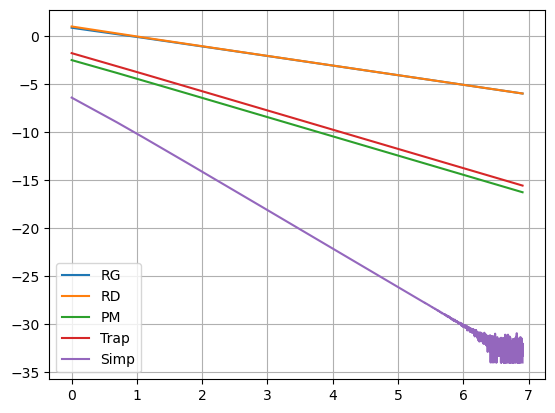

In [35]:
vec_Erreur(f3,3,8,38/3,1000)

Graphiquement les coefficients directeurs de chacunes des droites représentant les methodes des rectangles à droite et à gauche est de -1, methodes des points milieu et trapeze est de -2 et methode de simpson est de -4. Donc:
##### La méthode des rectangles à gauche et la méthode des rectangles à droite sont d'ordre 1
##### La méthode des points milieu et la méthode des trapèzes est d'ordre 2
##### La méthode de Simpson est d'ordre 4